<a href="https://colab.research.google.com/github/powerflow77/TimeSeries/blob/main/MLP-SHAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install shap

In [29]:
import shap
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.


In [14]:
np.random.seed(511)

num_data = 2400
x1 = np.random.rand(num_data) * 10
x2 = np.random.rand(num_data) * 10
e = np.random.normal(0, 0.5, num_data)
X = np.array([x1, x2]).T
y = 2*np.sin(x1) + np.log(0.5*x2**2) + e
y = y.reshape(-1, 1)

x_train = X[:2000]
y_train = y[:2000]

x_test = X[2000:]
y_test = y[2000:]


print(x_train.shape)
print(x_test.shape)

(2000, 2)
(400, 2)


In [15]:
with tf.device('/GPU:0'):
    model = keras.Sequential()
    model.add(layers.Dense(units=64, input_dim=x_train.shape[1], activation='relu', use_bias=True))
    model.add(layers.Dense(units=64, activation='relu', use_bias=True))
    model.add(layers.Dense(units=1))

    optimizer = optimizers.Adam(learning_rate=0.001)
    model.compile(loss='mean_absolute_error', optimizer=optimizer)
    history = model.fit(x_train, y_train, batch_size=64, epochs=800, verbose=1)

Epoch 1/800
32/32 [==============================] - 1s 6ms/step - loss: 1.9544
Epoch 2/800
32/32 [==============================] - 0s 5ms/step - loss: 1.3485
Epoch 3/800
32/32 [==============================] - 0s 3ms/step - loss: 1.2942
Epoch 4/800
32/32 [==============================] - 0s 3ms/step - loss: 1.2756
Epoch 5/800
32/32 [==============================] - 0s 3ms/step - loss: 1.2543
Epoch 6/800
32/32 [==============================] - 0s 3ms/step - loss: 1.2384
Epoch 7/800
32/32 [==============================] - 0s 3ms/step - loss: 1.2249
Epoch 8/800
32/32 [==============================] - 0s 3ms/step - loss: 1.2042
Epoch 9/800
32/32 [==============================] - 0s 3ms/step - loss: 1.1910
Epoch 10/800
32/32 [==============================] - 0s 3ms/step - loss: 1.1739
Epoch 11/800
32/32 [==============================] - 0s 3ms/step - loss: 1.1598
Epoch 12/800
32/32 [==============================] - 0s 3ms/step - loss: 1.1369
Epoch 13/800
32/32 [=================

In [16]:
# 모델 구조 확인
#model.summary()

In [17]:
model.evaluate(x_test, y_test)

13/13 [==============================] - 0s 3ms/step - loss: 0.4010


0.4010281264781952

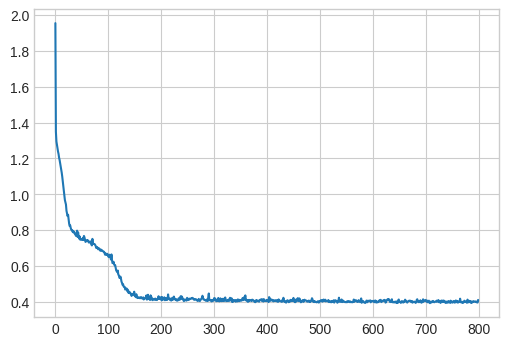

In [24]:
fig, ax = plt.subplots(1,1, figsize=(6, 4))
ax.plot(history.history['loss'], label='Training Loss')
plt.show()

In [40]:
x_test[0, :].shape

(2,)

In [54]:
explainer = shap.KernelExplainer(model.predict, x_train)
shap_values = explainer.shap_values(x_test[0, :].reshape(-1, 2))

63/63 [==============================] - 0s 5ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

125/125 [==============================] - 0s 2ms/step


In [58]:
print(shap_values[0][0])

[1.06372928 0.4628877 ]


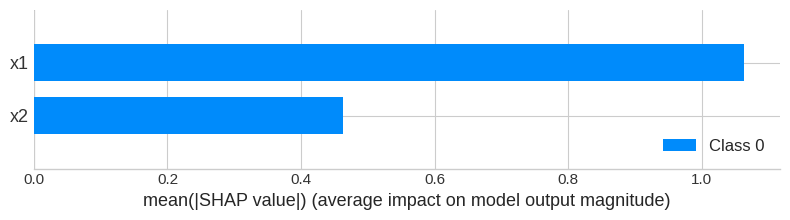

In [55]:
shap.summary_plot(shap_values, x_test[0, :].reshape(-1, 2), feature_names=['x1', 'x2'])